In [2]:
import pandas as pd
import numpy as np
import json
import os
import glob

In [3]:
json_list = glob.glob('./json/*.json')
json_list

['./json\\10_year_hodl_wave.json',
 './json\\1_year_hodl_wave.json',
 './json\\5_year_hodl_wave.json',
 './json\\addresses_non_zero_balance.json',
 './json\\addresses_with_balance_0.01.json',
 './json\\addresses_with_balance_0.1.json',
 './json\\addresses_with_balance_1.json',
 './json\\addresses_with_balance_10.json',
 './json\\addresses_with_balance_100.json',
 './json\\addresses_with_balance_1000.json',
 './json\\addresses_with_balance_10000.json',
 './json\\balanced_price.json',
 './json\\bitcoin_active_addresses.json',
 './json\\bitcoin_funding_rates.json',
 './json\\bitcoin_hashrate.json',
 './json\\bitcoin_lightning_capacity.json',
 './json\\bitcoin_lightning_nodes.json',
 './json\\bitcoin_miner_difficulty.json',
 './json\\bitcoin_open_interest.json',
 './json\\circulating_supply.json',
 './json\\coin_days_destroyed.json',
 './json\\cvdd.json',
 './json\\delta_top.json',
 './json\\hash_ribbons_indicator.json',
 './json\\hodl_waves.json',
 './json\\long_term_holder_realized_price

In [4]:
def json_to_df(path):
     with open(path, 'r') as j:
          contents = json.loads(j.read())

     y = contents['response']['chart']['figure']['data'][1]['y']
     x = contents['response']['chart']['figure']['data'][1]['x']
     name = contents['response']['chart']['figure']['data'][1]['name']
     df = pd.DataFrame([x, y]).T.dropna()
     df.columns = ['date', name]
     df = df.set_index('date')
     return df

In [5]:
target_json = json_list[5]

In [7]:
json_list[20]

'./json\\coin_days_destroyed.json'

In [8]:
json_to_df(json_list[20])

,CDD (90dma)
date,
2010-08-17,165923.791072
2010-08-18,342429.247587
2010-08-19,262642.635466
2010-08-20,225514.676602
2010-08-21,277364.865932
...,...
2025-03-01,17632599.55495
2025-03-02,17624390.500979
2025-03-03,17476675.697115


In [55]:
df = pd.DataFrame()
for target in json_list:
     try:
          part_df = json_to_df(target)
          df = pd.concat([df, part_df], axis=1)
          print(df)
     except:
          pass


           10Yr+ HODL Wave
date                      
2010-08-17             0.0
2010-08-18             0.0
2010-08-19             0.0
2010-08-20             0.0
2010-08-21             0.0
...                    ...
2025-03-01        0.170982
2025-03-02        0.170985
2025-03-03        0.170959
2025-03-04        0.170959
2025-03-05        0.170971

[5314 rows x 1 columns]
           10Yr+ HODL Wave 1Yr+ HODL Wave
date                                     
2010-08-17             0.0       0.278452
2010-08-18             0.0       0.278159
2010-08-19             0.0       0.277859
2010-08-20             0.0       0.277771
2010-08-21             0.0       0.278326
...                    ...            ...
2025-03-01        0.170982       0.623734
2025-03-02        0.170985       0.624265
2025-03-03        0.170959       0.624802
2025-03-04        0.170959       0.624867
2025-03-05        0.170971       0.625158

[5314 rows x 2 columns]
           10Yr+ HODL Wave 1Yr+ HODL Wave 5Yr+ HODL W

In [58]:
json_list

['./json\\10_year_hodl_wave.json',
 './json\\1_year_hodl_wave.json',
 './json\\5_year_hodl_wave.json',
 './json\\addresses_non_zero_balance.json',
 './json\\addresses_with_balance_0.01.json',
 './json\\addresses_with_balance_0.1.json',
 './json\\addresses_with_balance_1.json',
 './json\\addresses_with_balance_10.json',
 './json\\addresses_with_balance_100.json',
 './json\\addresses_with_balance_1000.json',
 './json\\addresses_with_balance_10000.json',
 './json\\balanced_price.json',
 './json\\bitcoin_active_addresses.json',
 './json\\bitcoin_funding_rates.json',
 './json\\bitcoin_hashrate.json',
 './json\\bitcoin_lightning_capacity.json',
 './json\\bitcoin_lightning_nodes.json',
 './json\\bitcoin_miner_difficulty.json',
 './json\\bitcoin_open_interest.json',
 './json\\circulating_supply.json',
 './json\\coin_days_destroyed.json',
 './json\\cvdd.json',
 './json\\delta_top.json',
 './json\\hash_ribbons_indicator.json',
 './json\\hodl_waves.json',
 './json\\long_term_holder_realized_price

In [60]:
pd.set_option('display.max_columns', None)
df = df.drop(['Funding Rate', 'BTC', 'Bybit', 'Hash Rate 30DMA', '24h', 'Long Term Holder Supply', 'lower_bound_2', 'red_zone_upper', 'lower_bound_1', 'Short Term Holder Supply', 'SOPR'], axis=1)

In [64]:
df = df.dropna()

In [66]:
df_columns = list(df.columns)
df_columns[-1] = 'Whale Shadows'
df.columns = df_columns

In [68]:
df.to_csv("./csv/preprocessed_index.csv", index=True)

In [70]:
df = pd.read_csv("./csv/preprocessed_index.csv")
df = df.set_index('date')
df

,10Yr+ HODL Wave,1Yr+ HODL Wave,5Yr+ HODL Wave,Addresses with > 0 BTC,Addresses with > 0.01 BTC,Addresses with > 0.1 BTC,Addresses with > 1 BTC,Addresses with > 10 BTC,Addresses with > 100 BTC,"Addresses with > 1,000 BTC","Addresses with > 10,000 BTC",Balanced Price,Active Addresses 7DMA,Hash Rate 7DMA,Miner Difficulty,Circulating Supply,CDD (90dma),CVDD,Delta Top,Long-Term Holder Realized Price,Miner Revenue - Block Rewards,Miner Revenue - Fees,Miner Fees %,Miner Revenue - Total,New Addresses,Addresses in Loss,Addresses in Profit,Realized Price,MVOCD,Short-Term Holder Realized Price,Supply Adjusted CDD (90dma),Terminal Price,Top Cap,VDD Multiple,Whale Shadows
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-08-17,0.000000,0.278452,0.000000,54908,54908,53270,52870,51012,731,159,25,0.052498,494.000000,3.281812e-03,5.117735e+02,3.745850e+06,1.659238e+05,0.002477,0.124766,0.050500,6450.00,0.000000,0.000000,6450.000000,331,0.065394,0.934606,0.052508,0.003101,0.054936,0.044295,0.000197,1.213937,0.178374,0.000000
2010-08-18,0.000000,0.278159,0.000000,54916,54916,53267,52819,50962,734,165,25,0.052523,610.000000,3.332692e-03,5.117735e+02,3.752500e+06,3.424292e+05,0.002487,0.124861,0.050500,6650.00,1.560000,0.000235,6651.560000,415,0.076241,0.923759,0.052561,0.006252,0.055053,0.091293,0.000791,1.215336,0.178690,0.000000
2010-08-19,0.000000,0.277859,0.000000,55031,55031,53356,52897,51037,741,164,25,0.052547,563.333333,3.366613e-03,5.117735e+02,3.759250e+06,2.626426e+05,0.002483,0.124823,0.050500,6750.00,0.000000,0.000000,6750.000000,316,0.090305,0.909695,0.052590,0.003101,0.055120,0.070001,0.000902,1.216552,0.179012,0.000000
2010-08-20,0.000000,0.277771,0.000000,55103,55103,53410,52948,51082,742,168,25,0.052574,586.500000,3.752459e-03,5.117735e+02,3.768900e+06,2.255147e+05,0.002479,0.125018,0.050500,9650.00,0.000000,0.000000,9650.000000,403,0.091360,0.908640,0.052622,0.002542,0.055189,0.060071,0.001022,1.216697,0.179471,0.000000
2010-08-21,0.000000,0.278326,0.000000,55223,55223,53510,53038,51173,745,169,25,0.052605,574.800000,3.882205e-03,5.117735e+02,3.777550e+06,2.773649e+05,0.002488,0.125303,0.050500,8650.00,0.000000,0.000000,8650.000000,340,0.090410,0.909590,0.052679,0.003101,0.055322,0.073723,0.001551,1.217255,0.179883,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-01,0.170982,0.623734,0.308860,54538498,12400626,4472374,995543,152529,18011,2041,95,33716.764300,791865.857143,7.981913e+08,1.105684e+14,1.983100e+07,1.763260e+07,31856.883495,208444.111605,24906.944293,450.00,5.810985,0.012749,455.810985,323508,0.109724,0.890276,43355.276640,38541.938206,91825.549358,0.890219,202408.759147,475214.124372,0.850358,261.863213
2025-03-02,0.170985,0.624265,0.308883,54563626,12406917,4474646,996285,152578,18015,2042,95,33773.673908,815265.857143,7.930500e+08,1.105684e+14,1.983139e+07,1.762439e+07,31869.765124,208770.131606,24918.782523,393.75,5.543124,0.013882,399.293124,305870,0.088230,0.911770,43415.892222,37836.305903,92008.250199,0.889796,202486.584595,475705.569736,0.853241,550.820936
2025-03-03,0.170959,0.624802,0.308754,54536439,12408602,4474528,996354,152507,17982,2045,95,33735.498396,829961.857143,8.087540e+08,1.105684e+14,1.983186e+07,1.747668e+07,31908.155378,208494.819414,24919.833739,468.75,6.063964,0.012771,474.813964,337406,0.109742,0.890258,43389.103527,38541.938206,91785.832776,0.882312,202725.707743,476144.526368,0.872918,1640.454923


<Axes: xlabel='date'>

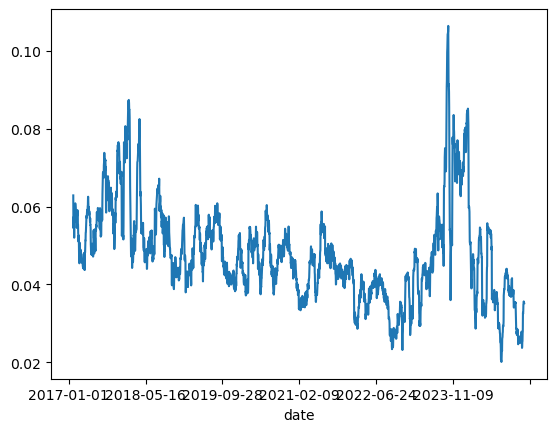

In [86]:
target = (df['New Addresses']/df['Active Addresses 7DMA'])
# target = (df['New Addresses'])
target = target[target.index >= '2017-01-01']
target = target.rolling(30).std()
target.plot()

<Axes: xlabel='date'>

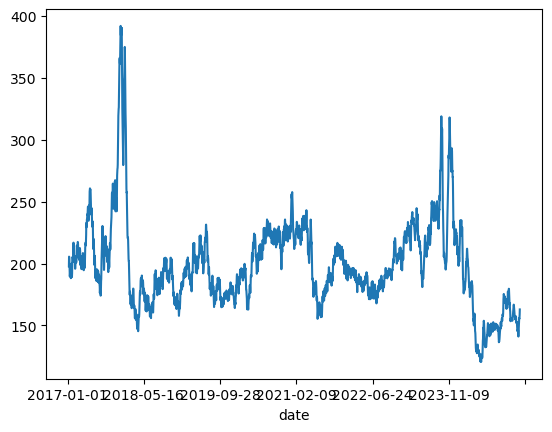

In [77]:
target = (df['New Addresses']/df['Addresses with > 1,000 BTC'])
target = target[target.index >= '2017-01-01']
target = target.rolling(10).mean()
target.plot()